In [ ]:
!pip install -q gdown
!gdown --fuzzy 'https://drive.google.com/file/d/1JsDQrujo-qdQPMIdjkXmkzmN8xQIQRig/view?usp=sharing'


Downloading...
From: https://drive.google.com/uc?id=1JsDQrujo-qdQPMIdjkXmkzmN8xQIQRig
To: /content/Spacex.csv
100% 11.9k/11.9k [00:00<00:00, 36.4MB/s]


In [ ]:
# read spacex data
import pandas as pd
spacex = pd.read_csv('Spacex.csv')

In [ ]:
spacex.head()

,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing _Outcome
0,04-06-2010,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,08-12-2010,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,22-05-2012,07:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,08-10-2012,00:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,01-03-2013,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [ ]:
spacex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               101 non-null    object
 1   Time (UTC)         101 non-null    object
 2   Booster_Version    101 non-null    object
 3   Launch_Site        101 non-null    object
 4   Payload            101 non-null    object
 5   PAYLOAD_MASS__KG_  101 non-null    int64 
 6   Orbit              101 non-null    object
 7   Customer           101 non-null    object
 8   Mission_Outcome    101 non-null    object
 9   Landing _Outcome   101 non-null    object
dtypes: int64(1), object(9)
memory usage: 8.0+ KB


In [ ]:
spacex.describe()

,PAYLOAD_MASS__KG_
count,101.000000
mean,6138.287129
std,4900.998607
min,0.000000
25%,2500.000000
50%,4535.000000
75%,9600.000000
max,15600.000000


In [ ]:
# convert some colums to be categorical
spacex["Booster_Version"] = spacex["Booster_Version"].astype("category")
spacex["Orbit"] = spacex["Orbit"].astype("category")
spacex["Launch_Site"] = spacex["Launch_Site"].astype("category")
spacex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Date               101 non-null    object  
 1   Time (UTC)         101 non-null    object  
 2   Booster_Version    101 non-null    category
 3   Launch_Site        101 non-null    category
 4   Payload            101 non-null    object  
 5   PAYLOAD_MASS__KG_  101 non-null    int64   
 6   Orbit              101 non-null    category
 7   Customer           101 non-null    object  
 8   Mission_Outcome    101 non-null    object  
 9   Landing _Outcome   101 non-null    object  
dtypes: category(3), int64(1), object(6)
memory usage: 9.3+ KB


In [ ]:
# helper functions to make time and date variables useful

# Function to convert time string (HH:MM) to total minutes
def add_time_to_minutes(time_series: pd.Series) -> pd.Series:
    """
    Converts a time column (HH:MM) to total minutes since midnight.
    """
    return pd.to_datetime(time_series, format="%H:%M:%S").dt.hour * 60 + pd.to_datetime(time_series, format="%H:%M:%S").dt.minute


def add_date_features(date_series: pd.Series, df_add : pd.DataFrame):
    """
    Convert a date column to ML-friendly features:
    - day_of_week (0=Monday, 6=Sunday)
    - month (1-12)
    - day_of_month (1-31)
    - is_weekend (0/1)
    - cyclical encoding for day_of_week and month
    """
    dates = pd.to_datetime(date_series, format="%d-%m-%Y")

    df_add["day_of_week"] = dates.dt.dayofweek
    df_add["month"] = dates.dt.month
    df_add["day_of_month"] = dates.dt.day
    df_add["is_weekend"] = df_add["day_of_week"].isin([5,6]).astype(int)

spacex['minutes'] = add_time_to_minutes(spacex['Time (UTC)'])
add_date_features(spacex['Date'], spacex)


spacex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Date               101 non-null    object  
 1   Time (UTC)         101 non-null    object  
 2   Booster_Version    101 non-null    category
 3   Launch_Site        101 non-null    category
 4   Payload            101 non-null    object  
 5   PAYLOAD_MASS__KG_  101 non-null    int64   
 6   Orbit              101 non-null    category
 7   Customer           101 non-null    object  
 8   Mission_Outcome    101 non-null    object  
 9   Landing _Outcome   101 non-null    object  
 10  minutes            101 non-null    int32   
 11  day_of_week        101 non-null    int32   
 12  month              101 non-null    int32   
 13  day_of_month       101 non-null    int32   
 14  is_weekend         101 non-null    int64   
dtypes: category(3), int32(4), int64(2), object(6)
memory usag

In [ ]:
# categorize landing outcomes as either: failure, sucess, or no attempt

def categorize_landing(outcome):
    outcome = outcome.lower()
    if outcome.startswith("success") or outcome.startswith("controlled"):
        return "success"
    elif outcome.startswith("failure") or outcome.startswith("uncontrolled"):
        return "failure"
    elif "no attempt" in outcome or "precluded" in outcome:
        return "no_attempt"
    else:
        print("Warning! Missing outcome type! Defaulting to failure")
        return "failure"  # catch-all

spacex['landing_category'] = spacex['Landing _Outcome'].apply(categorize_landing).astype("category")

spacex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Date               101 non-null    object  
 1   Time (UTC)         101 non-null    object  
 2   Booster_Version    101 non-null    category
 3   Launch_Site        101 non-null    category
 4   Payload            101 non-null    object  
 5   PAYLOAD_MASS__KG_  101 non-null    int64   
 6   Orbit              101 non-null    category
 7   Customer           101 non-null    object  
 8   Mission_Outcome    101 non-null    object  
 9   Landing _Outcome   101 non-null    object  
 10  minutes            101 non-null    int32   
 11  day_of_week        101 non-null    int32   
 12  month              101 non-null    int32   
 13  day_of_month       101 non-null    int32   
 14  is_weekend         101 non-null    int64   
 15  landing_category   101 non-null    category
dtypes: categ

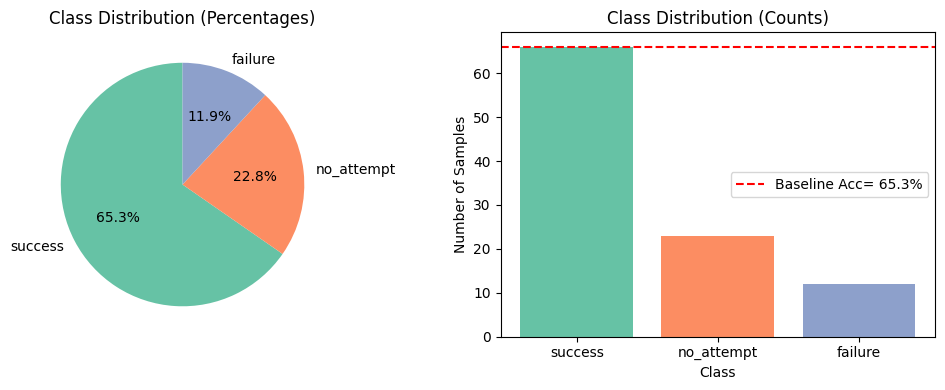

In [ ]:
# extract useful feature cols
# NOTE: dropped booster version as it was changing nearly every launch and no patterns to be seen

import matplotlib.pyplot as plt

# feature_cols = [
#     "Launch_Site", "PAYLOAD_MASS__KG_", "Orbit",
#     "minutes",
#     "day_of_week", "is_weekend",
#     "month",
# ]

feature_cols = [
    "PAYLOAD_MASS__KG_", "Orbit",
    "is_weekend",
    "month",
]

X_cat = spacex[feature_cols]
y_cat = spacex["landing_category"]


counts = y_cat.value_counts()
total = counts.sum()
baseline_acc = counts.max() / total  # majority class baseline

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# --- Pie chart ---
axes[0].pie(
    counts,
    labels=counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=plt.cm.Set2.colors
)
axes[0].set_title("Class Distribution (Percentages)")

# --- Bar chart ---
bars = axes[1].bar(counts.index.astype(str), counts.values, color=plt.cm.Set2.colors)
axes[1].set_title("Class Distribution (Counts)")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Number of Samples")

# Add baseline accuracy annotation
axes[1].axhline(counts.max(), color="red", linestyle="--", label=f"Baseline Acc= {baseline_acc:.1%}")
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# one hot encode categorical colums to turn categories into numerical data
import pandas as pd

# Detect categorical columns
categorical_cols = X_cat.select_dtypes(["category", "object"]).columns.tolist()

# One-hot encode categorical columns
if categorical_cols:
    X_encoded = pd.get_dummies(X_cat, columns=categorical_cols, drop_first=False)
else:
    X_encoded = X_cat.copy()

# Now X_encoded has all numeric features plus one-hot encoded categorical features
X = X_encoded

y = pd.get_dummies(y_cat, drop_first=False)

X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   PAYLOAD_MASS__KG_  101 non-null    int64
 1   is_weekend         101 non-null    int64
 2   month              101 non-null    int32
 3   Orbit_GTO          101 non-null    bool 
 4   Orbit_HEO          101 non-null    bool 
 5   Orbit_LEO          101 non-null    bool 
 6   Orbit_LEO (ISS)    101 non-null    bool 
 7   Orbit_MEO          101 non-null    bool 
 8   Orbit_Polar LEO    101 non-null    bool 
 9   Orbit_SSO          101 non-null    bool 
 10  Orbit_Sub-orbital  101 non-null    bool 
dtypes: bool(8), int32(1), int64(2)
memory usage: 2.9 KB


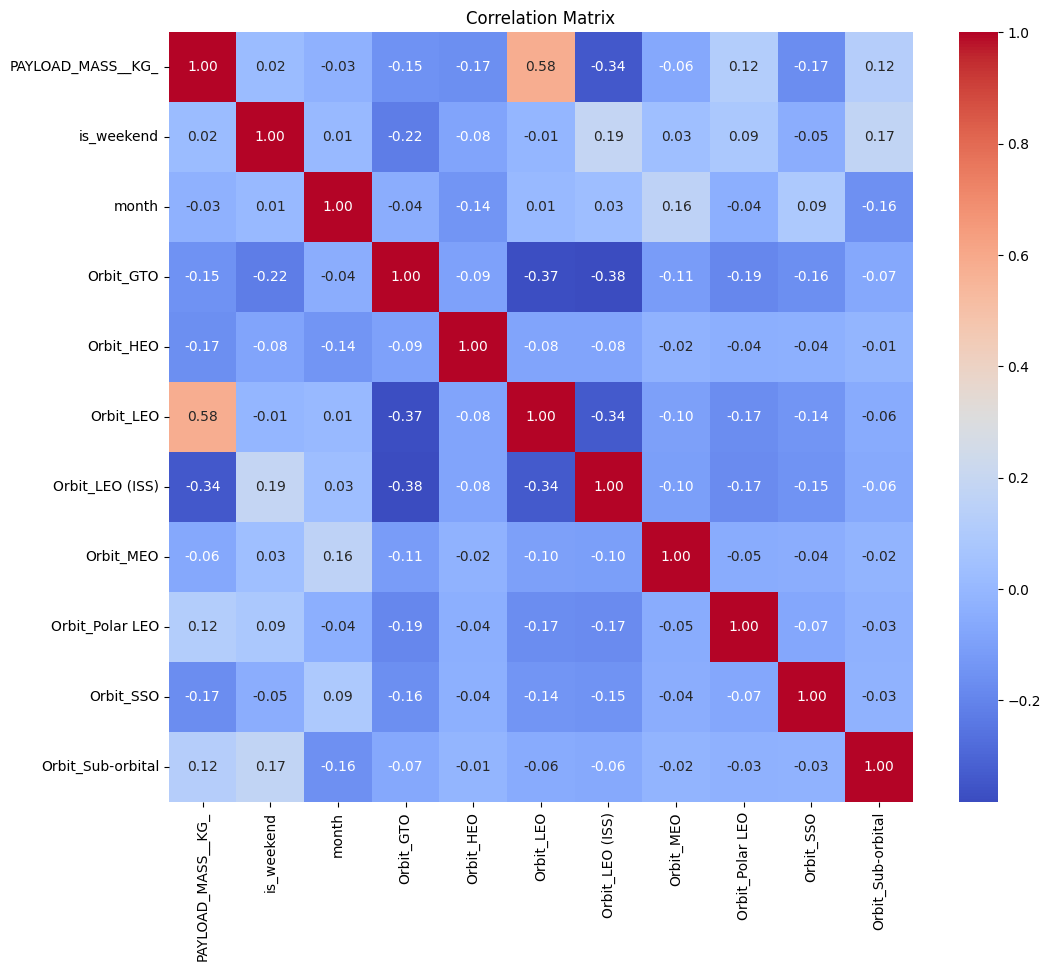

In [ ]:
# display correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# start creating test/train datasets
from sklearn.model_selection import train_test_split


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# X_val = X_test = X_temp
# y_val = y_test = y_temp

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.3, random_state=42, stratify=y_temp
)

print(y_train.value_counts())
print(y_val.value_counts())
print(y_test.value_counts())

# normalize data

from sklearn.preprocessing import StandardScaler


# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training numeric columns (only one)
X_train[["PAYLOAD_MASS__KG_"]] = scaler.fit_transform(X_train[["PAYLOAD_MASS__KG_"]])
X_val[["PAYLOAD_MASS__KG_"]] = scaler.transform(X_val[["PAYLOAD_MASS__KG_"]])
X_test[["PAYLOAD_MASS__KG_"]] = scaler.transform(X_test[["PAYLOAD_MASS__KG_"]])

# Select only numeric columns that are not boolean
numeric_cols = X_train.select_dtypes(include=["int64", "int32"]).columns
# Convert remaining columns (non-numeric, e.g., bool) to float
non_numeric_cols = X_train.columns.difference(numeric_cols)
X_train[non_numeric_cols] = X_train[non_numeric_cols].astype(float)
X_val[non_numeric_cols] = X_val[non_numeric_cols].astype(float)
X_test[non_numeric_cols] = X_test[non_numeric_cols].astype(float)



failure  no_attempt  success
False    False       True       39
         True        False      14
True     False       False       7
Name: count, dtype: int64
failure  no_attempt  success
False    False       True       19
         True        False       6
True     False       False       3
Name: count, dtype: int64
failure  no_attempt  success
False    False       True       8
         True        False      3
True     False       False      2
Name: count, dtype: int64


In [ ]:
# tensors

import torch


X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

# Convert targets (one-hot encoded)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


In [ ]:
# check shapes
print(X_train_tensor.shape, y_train_tensor.shape)
print(X_val_tensor.shape, y_val_tensor.shape)
print(X_test_tensor.shape, y_test_tensor.shape)


torch.Size([60, 11]) torch.Size([60, 3])
torch.Size([28, 11]) torch.Size([28, 3])
torch.Size([13, 11]) torch.Size([13, 3])


In [ ]:
# define neural network
import torch.nn as nn
import torch.nn.functional as F

class SpaceXNet(nn.Module):
    def __init__(self, input_dim, output_dim, dropout=0.3):
        super(SpaceXNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, output_dim)
        self.dropout = nn.Dropout(dropout)  # dropout layer

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # dropout after first layer
        x = F.relu(self.fc2(x))
        x = self.dropout(x)  # dropout after second layer
        x = self.fc3(x)       # logits
        return x




In [ ]:
# create batch training data loaders
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset   = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset  = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=16)
test_loader  = DataLoader(test_dataset, batch_size=16)


In [ ]:
from torch.utils.data import DataLoader, Subset
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score
import numpy as np
import torch

def train_model(train_dataset, val_loader,
                input_dim, output_dim,
                batch_size=16, epochs=100, lr=0.0005, dropout=0,
                device="cpu", class_weight="balanced", clip_grad=0,
                break_epochs=0):
    """
    Trains a model on a given subset of the training dataset.
    Returns:
        training_loss_history, validation_loss_history,
        validation_macro_f1_history, validation_accuracy_history, final_model
    """
    # --- Create loader for the subset ---
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # --- Compute class weights on subset ---
    y_subset = [y.numpy() for _, y in train_dataset]
    y_subset_int = np.argmax(np.stack(y_subset), axis=1)

    weights_partial = compute_class_weight(
        class_weight=class_weight,
        classes=np.unique(y_subset_int),
        y=y_subset_int
    )

    full_weights = np.ones(output_dim, dtype=np.float32)
    for cls, w in zip(np.unique(y_subset_int), weights_partial * 0.4):
        full_weights[cls] = w

    class_weights = torch.tensor(full_weights, dtype=torch.float32).to(device)

    print(class_weights)

    # --- Initialize model ---
    model = SpaceXNet(input_dim=input_dim, output_dim=output_dim, dropout=dropout).to(device)
    criterion = torch.nn.CrossEntropyLoss(weight=class_weights)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    training_loss_time = []
    validation_loss_time = []
    validation_macro_f1_time = []
    validation_accuracy_time = []

    # --- Early stopping state ---
    best_f1 = -float("inf")
    epochs_no_improve = 0

    # --- Training loop ---
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0

        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            y_indices = torch.argmax(y_batch, dim=1)
            loss = criterion(outputs, y_indices)
            loss.backward()
            if clip_grad > 0:
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip_grad)
            optimizer.step()
            train_loss += loss.item() * X_batch.size(0)

        train_loss /= len(train_loader.dataset)
        training_loss_time.append(train_loss)

        # --- Validation ---
        model.eval()
        val_loss, all_preds, all_targets = 0.0, [], []

        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                y_indices = torch.argmax(y_batch, dim=1)
                loss = criterion(outputs, y_indices)
                val_loss += loss.item() * X_batch.size(0)

                predicted = torch.argmax(outputs, dim=1)
                all_preds.append(predicted.cpu().numpy())
                all_targets.append(y_indices.cpu().numpy())

        val_loss /= len(val_loader.dataset)
        validation_loss_time.append(val_loss)

        # --- Macro F1 ---
        all_preds = np.concatenate(all_preds)
        all_targets = np.concatenate(all_targets)
        val_macro_f1 = f1_score(all_targets, all_preds, average="macro")
        validation_macro_f1_time.append(val_macro_f1)

        val_acc = (all_preds == all_targets).mean()
        validation_accuracy_time.append(val_acc)

        if (epoch+1) % 10 == 0:
            print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}, Val Macro-F1={val_macro_f1:.4f}")

        # --- Break condition ---
        if break_epochs > 0:
            if val_macro_f1 > best_f1:
                best_f1 = val_macro_f1
                epochs_no_improve = 0
            else:
                epochs_no_improve += 1
                if epochs_no_improve >= break_epochs:
                    print(f"Stopping early at epoch {epoch+1} due to no F1 improvement for {break_epochs} epochs.")
                    break

    return training_loss_time, validation_loss_time, validation_macro_f1_time, validation_accuracy_time, model


In [ ]:
# train with subsets of the data, to show how accuracy can increase with data

fractions = np.linspace(0.1, 1, 20)

subset_results = []

input_dim = X_train_tensor.shape[1]
output_dim = y_train_tensor.shape[1]

training_loss_time = validation_loss_time = f1_score_time = val_acc_time = []
final_model = None

for frac in fractions:

    indices = np.arange(len(y_train_tensor))

    if frac < 1:
      train_indices, _ = train_test_split(
          indices,
          train_size=frac,
          stratify=np.argmax(y_train_tensor.numpy(), axis=1)  # preserves class proportions
      )
      subset = Subset(train_dataset, train_indices)
    else:
      subset = train_dataset


    train_loss, val_loss, f1, val_acc, model = train_model(
        train_dataset=subset,
        val_loader=val_loader,
        input_dim=input_dim,
        output_dim=output_dim,
        epochs=100,
        lr=0.0005,
        class_weight='balanced',
        device="cpu",
        # break_epochs=30
    )

    print(f"{frac=} {val_acc[-1]=}")

    if frac == 1.0:
        # set final loss/training vars
        training_loss_time = train_loss
        validation_loss_time = val_loss
        f1_score_time = f1
        val_acc_time = val_acc
        final_model = model

    subset_results.append((frac, val_acc[-1])) # for each subset get the latest val acc

tensor([0.8000, 0.8000, 0.2000])
Epoch 10: Train Loss=1.0394, Val Loss=1.0695, Val Macro-F1=0.2695
Epoch 20: Train Loss=1.0197, Val Loss=1.0628, Val Macro-F1=0.2695
Epoch 30: Train Loss=0.9999, Val Loss=1.0573, Val Macro-F1=0.2695
Epoch 40: Train Loss=0.9800, Val Loss=1.0530, Val Macro-F1=0.2695
Epoch 50: Train Loss=0.9599, Val Loss=1.0495, Val Macro-F1=0.2695
Epoch 60: Train Loss=0.9393, Val Loss=1.0467, Val Macro-F1=0.2695
Epoch 70: Train Loss=0.9183, Val Loss=1.0451, Val Macro-F1=0.2695
Epoch 80: Train Loss=0.8965, Val Loss=1.0441, Val Macro-F1=0.2695
Epoch 90: Train Loss=0.8749, Val Loss=1.0448, Val Macro-F1=0.2695
Epoch 100: Train Loss=0.8536, Val Loss=1.0478, Val Macro-F1=0.2695
frac=np.float64(0.1) val_acc[-1]=np.float64(0.6785714285714286)
tensor([1.0667, 0.5333, 0.2133])
Epoch 10: Train Loss=1.1294, Val Loss=1.1076, Val Macro-F1=0.2598
Epoch 20: Train Loss=1.1172, Val Loss=1.1037, Val Macro-F1=0.2598
Epoch 30: Train Loss=1.1075, Val Loss=1.1003, Val Macro-F1=0.2372
Epoch 40: T

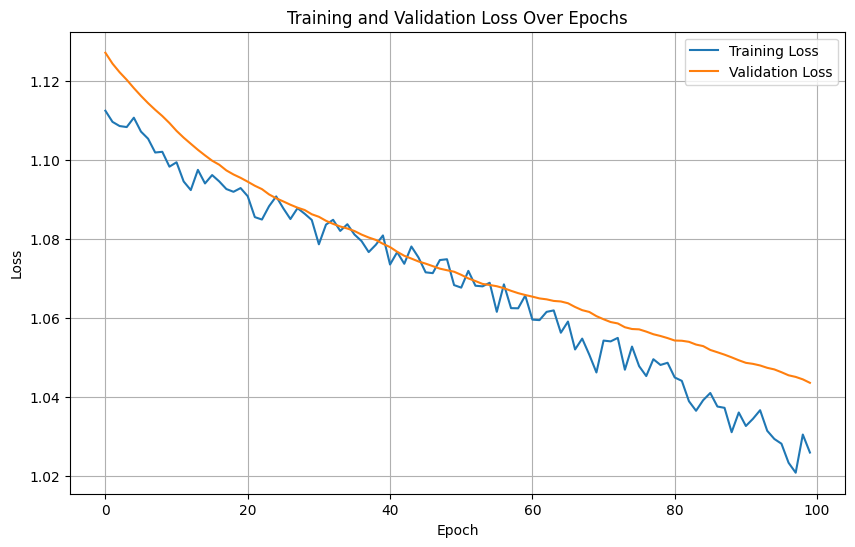

In [ ]:
# training and validation loss when using 100% of the data
plt.figure(figsize=(10, 6))
plt.plot(training_loss_time, label='Training Loss')
plt.plot(validation_loss_time, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

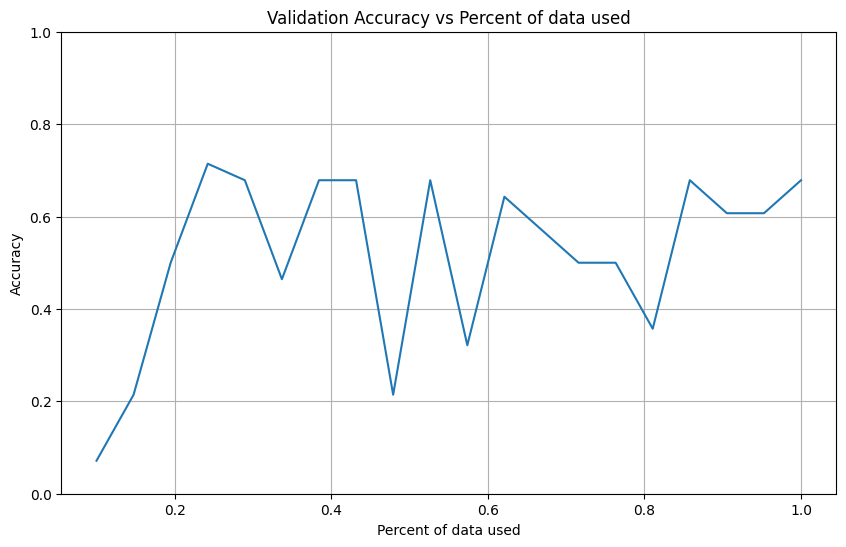

In [ ]:
# plot of
plt.figure(figsize=(10, 6))
sizes, val_accs = zip(*subset_results)
plt.plot(sizes, val_accs)
plt.title('Validation Accuracy vs Percent of data used')
plt.xlabel('Percent of data used')
plt.ylabel('Accuracy')
plt.ylim(0, 1)   # set y-axis from 0 to 1
plt.grid(True)
plt.show()

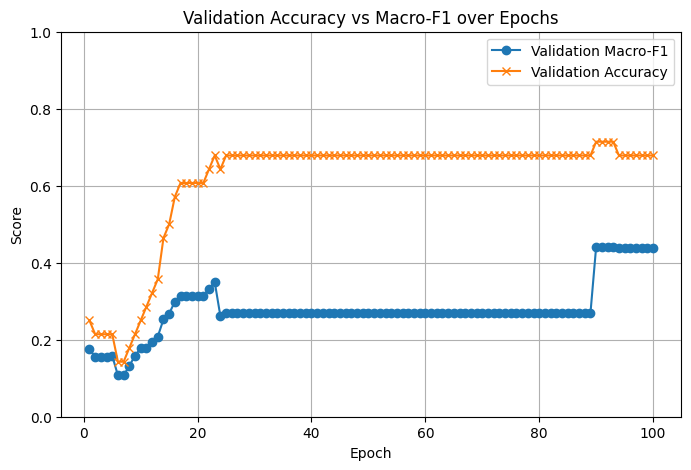

In [ ]:
epochs_range = range(1, len(f1_score_time)+1)
plt.figure(figsize=(8,5))

# Macro-F1 curve
plt.plot(epochs_range, f1_score_time, marker='o', label="Validation Macro-F1")

# Accuracy curve
plt.plot(epochs_range, val_acc_time, marker='x', label="Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Score")
plt.ylim(0,1)
plt.title("Validation Accuracy vs Macro-F1 over Epochs")
plt.grid(True)
plt.legend()
plt.show()


Test Accuracy: 0.38461538461538464


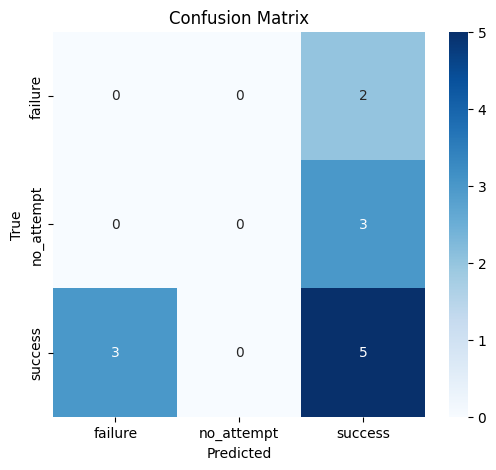

In [ ]:
final_model.eval()
correct = 0
total = 0

all_preds = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = final_model(X_batch)
        y_indices = torch.argmax(y_batch, dim=1)
        predicted = torch.argmax(outputs, dim=1)
        correct += (predicted == y_indices).sum().item()
        total += y_batch.size(0)

        all_preds.extend(predicted.tolist())
        all_labels.extend(y_indices.tolist())

test_acc = correct / total
print("Test Accuracy:", test_acc)

# confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Optional: define class names
class_names = ['failure', 'no_attempt', 'success']

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


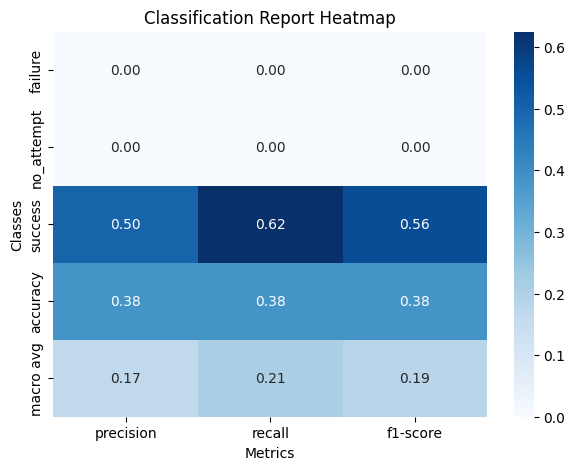

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(all_labels, all_preds, target_names=['failure', 'no_attempt', 'success'], output_dict=True)

# Convert the report to a DataFrame for easier plotting
df_report = pd.DataFrame(report).transpose()
df_report = df_report.iloc[:-1, :3] # Exclude 'accuracy', 'macro avg', 'weighted avg' and support columns

# Plot the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(df_report, annot=True, cmap='Blues', fmt=".2f")
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()


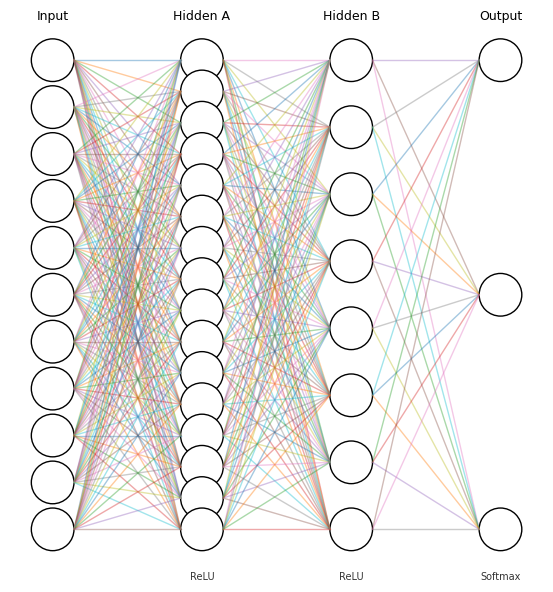

In [ ]:
# ffnn_diagram.py
"""
Feed-forward neural network diagram generator using matplotlib.

Usage example:
    from ffnn_diagram import draw_ffnn
    draw_ffnn([3, 6, 4, 2],
              layer_labels=["Input", "Hidden 1", "Hidden 2", "Output"],
              activations=["--", "ReLU", "ReLU", "Softmax"],
              figsize=(8,6),
              node_radius=0.10,
              savepath="ffnn_example.png")
"""

import math
import numpy as np
import matplotlib.pyplot as plt

def _get_layer_x_positions(n_layers, width=1.0, x_margin=0.1):
    if n_layers == 1:
        return [0.5]
    left = x_margin
    right = 1.0 - x_margin
    return np.linspace(left, right, n_layers)

def _get_nodes_y_positions(n_nodes, height=1.0, y_margin=0.05):
    if n_nodes == 1:
        return [0.5]
    top = 1.0 - y_margin
    bottom = y_margin
    return np.linspace(top, bottom, n_nodes)

def draw_ffnn(layers,
              layer_labels=None,
              activations=None,
              figsize=(25,6),
              node_radius=0.04,
              linewidth=1,
              node_edgecolor='k',
              node_facecolor='w',
              connection_alpha=0.4,
              show_bias=False,
              bias_color='red',
              font_size=8,
              savepath=None,
              dpi=200):
    """
    Draw a feed-forward neural network.

    Args:
        layers (list of int): number of nodes in each layer (e.g. [3,6,4,2])
        layer_labels (list of str or None): labels for each layer
        activations (list of str or None): activation name for each layer (displayed below layer)
        figsize (tuple): figure size for matplotlib
        node_radius (float): radius of node circles (in axes fraction)
        show_bias (bool): draw small bias nodes to the right of each layer (except input layer)
        savepath (str or None): if given, save the image to this path
    """
    n_layers = len(layers)
    if layer_labels is None:
        layer_labels = [f"L{idx}" for idx in range(n_layers)]
    if activations is None:
        activations = [""] * n_layers

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.axis('off')
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)

    xs = _get_layer_x_positions(n_layers, width=1.0, x_margin=0.08)
    node_positions = []  # list of lists: (x,y) per node per layer

    # compute positions
    for i, n_nodes in enumerate(layers):
        ys = _get_nodes_y_positions(n_nodes, height=1.0, y_margin=0.06)
        pos = [(xs[i], y) for y in ys]
        node_positions.append(pos)

    # draw connections
    for i in range(n_layers-1):
        for (x1,y1) in node_positions[i]:
            for (x2,y2) in node_positions[i+1]:
                ax.plot([x1 + node_radius, x2 - node_radius], [y1, y2],
                        linewidth=linewidth, alpha=connection_alpha)

    # draw nodes
    for i, layer in enumerate(node_positions):
        for (x,y) in layer:
            circle = plt.Circle((x,y), node_radius, edgecolor=node_edgecolor,
                                facecolor=node_facecolor, linewidth=1.0)
            ax.add_patch(circle)

    # optional bias nodes
    if show_bias:
        for i in range(1, n_layers):
            bx = xs[i] + 0.12
            by_top = node_positions[i][0][1]
            for j in range(len(node_positions[i])):
                by = node_positions[i][j][1]
                circ = plt.Circle((bx, by), node_radius*0.6,
                                  edgecolor='none', facecolor=bias_color, alpha=0.9)
                ax.add_patch(circ)
                ax.plot([bx - node_radius*0.6, node_positions[i][j][0] - node_radius],
                        [by, by], linewidth=linewidth*0.9, alpha=connection_alpha)

    # layer labels & activation names
    for i, lbl in enumerate(layer_labels):
        ax.text(xs[i], 1.01, lbl, fontsize=font_size+1, ha='center', va='bottom')
        if activations and activations[i]:
            ax.text(xs[i], -0.02, activations[i], fontsize=font_size-1, ha='center', va='top', alpha=0.8)

    ax.set_aspect('equal')
    plt.tight_layout()

    if savepath:
        plt.savefig(savepath, dpi=dpi, bbox_inches='tight')
    plt.show()

draw_ffnn([11, 16, 8, 3], layer_labels=["Input", "Hidden A", "Hidden B", "Output"], activations=["", "ReLU", "ReLU", "Softmax"], show_bias=False, savepath="ffnn_example.png")
